# Building a Electronics Product recommender

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cross_validation import train_test_split
import numpy as np
import time
from sklearn.externals import joblib


In [ ]:
import Recommenders as Recommenders
import Evaluation as Evaluation

# Load Product data

In [3]:
df=pd.read_csv("ratings_Electronics.csv", names=["user_id", "productId", "ratings","timestamp"])

In [4]:
df.head()

,user_id,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
df=df.drop(columns="timestamp")

In [6]:
df.head()

,user_id,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [7]:
df.shape

(7824482, 3)

In [8]:
df.head()

,user_id,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [9]:
df["eY"]=df.groupby("user_id")["productId"].transform("count")

In [10]:
df.head()

,user_id,productId,ratings,eY
0,AKM1MP6P0OYPR,0132793040,5.0,2
1,A2CX7LUOHB2NDG,0321732944,5.0,4
2,A2NWSAGRHCP8N5,0439886341,1.0,1
3,A2WNBOD3WNDNKT,0439886341,3.0,1
4,A1GI0U4ZRJA8WN,0439886341,1.0,1


In [11]:
df_a=df[df["eY"]>=50]

In [12]:
df_a.drop(columns="eY",inplace=True)

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
df_a.head()

,user_id,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [14]:
df_a.shape

(125871, 3)

## Count number of unique users in the dataset

In [15]:
users = df_a['user_id'].unique()

In [16]:
len(users)

1540

## Quiz 1. Count the number of unique Products in the dataset

In [17]:
###Fill in the code here
products = df_a['productId'].unique()
len(products)

48190

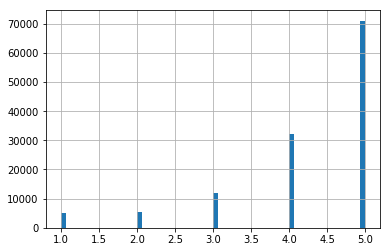

In [18]:
df_a['ratings'].hist(bins=60)

In [19]:
#From the above histogram it is clear that ratings 5 has more frequency.

# Create a Electronics Product recommender

In [20]:
train_data, test_data = train_test_split(df_a, test_size = 0.30, random_state=0)
print(train_data.head(5))

                user_id   productId  ratings
6595853  A2BYV7S1QP2YIG  B009EAHVTA      5.0
4738241   AB094YABX21WQ  B0056XCEAA      1.0
4175596  A3D0UM4ZD2CMAW  B004I763AW      5.0
3753016   AATWFX0ZZSE6C  B0040NPHMO      3.0
1734767  A1NNMOD9H36Q8E  B0015VW3BM      4.0


### Create an instance of popularity based recommender class

In [21]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'productId')

### Use the popularity model to make some predictions

In [22]:
user_id = users[20]
pm.recommend(user_id)

,user_id,productId,score,Rank
30847,A341HCMGNZCBIT,B0088CJT4U,133,1.0
30287,A341HCMGNZCBIT,B007WTAJTO,124,2.0
19647,A341HCMGNZCBIT,B003ES5ZUU,122,3.0
8752,A341HCMGNZCBIT,B000N99BBC,114,4.0
30555,A341HCMGNZCBIT,B00829THK0,97,5.0
30559,A341HCMGNZCBIT,B00829TIEK,97,6.0
17384,A341HCMGNZCBIT,B002R5AM7C,94,7.0
31107,A341HCMGNZCBIT,B008DWCRQW,91,8.0
17573,A341HCMGNZCBIT,B002SZEOLG,84,9.0
22744,A341HCMGNZCBIT,B004CLYEDC,82,10.0


In [23]:
user_id = users[7]
pm.recommend(user_id)

,user_id,productId,score,Rank
30847,A25RTRAPQAJBDJ,B0088CJT4U,133,1.0
30287,A25RTRAPQAJBDJ,B007WTAJTO,124,2.0
19647,A25RTRAPQAJBDJ,B003ES5ZUU,122,3.0
8752,A25RTRAPQAJBDJ,B000N99BBC,114,4.0
30555,A25RTRAPQAJBDJ,B00829THK0,97,5.0
30559,A25RTRAPQAJBDJ,B00829TIEK,97,6.0
17384,A25RTRAPQAJBDJ,B002R5AM7C,94,7.0
31107,A25RTRAPQAJBDJ,B008DWCRQW,91,8.0
17573,A25RTRAPQAJBDJ,B002SZEOLG,84,9.0
22744,A25RTRAPQAJBDJ,B004CLYEDC,82,10.0


### Quiz 2: Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [24]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)


,user_id,productId,score,Rank
30847,A3LDPF5FMB782Z,B0088CJT4U,133,1.0
30287,A3LDPF5FMB782Z,B007WTAJTO,124,2.0
19647,A3LDPF5FMB782Z,B003ES5ZUU,122,3.0
8752,A3LDPF5FMB782Z,B000N99BBC,114,4.0
30555,A3LDPF5FMB782Z,B00829THK0,97,5.0
30559,A3LDPF5FMB782Z,B00829TIEK,97,6.0
17384,A3LDPF5FMB782Z,B002R5AM7C,94,7.0
31107,A3LDPF5FMB782Z,B008DWCRQW,91,8.0
17573,A3LDPF5FMB782Z,B002SZEOLG,84,9.0
22744,A3LDPF5FMB782Z,B004CLYEDC,82,10.0


## Build a products recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

## Class for an item similarity based personalized recommender system

### Create an instance of item similarity based recommender class

In [25]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'productId')

In [26]:
train_data.head()

,user_id,productId,ratings
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
4738241,AB094YABX21WQ,B0056XCEAA,1.0
4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [27]:
#Print the products for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)

In [28]:

for user_item in user_items:
    print(user_item)

B000S5Q9CA
B009D79VH4
B00D4MFPLA
B004T9RR0E
B000HPV3RW
B00APUQPHW
B001F7HLRC
B00EVNVRM2
B0067WUVF4
B003GTSHY8
B00DQZQCUI
B00BAEVR4I
B00JXECZIY
B002WE6D44
B001VKQR5U
B003YKG2UK
B008S4TSAI
B007IO38MI
B00G6CLN3Y
B00HWMPSF6
B00JZAB8OI
B0009SHDGC
B0063705PE
B0001OHH0Q
B007HOHV9U
B00002EQC2
B00A1DJO12
B00ATZ9I9U
B007ZTKWFM
B001KN6WL2
B001963NZI
B00DT04I9W
B009SG71MC
B003X26PMO
B00CBCUS1G
0972683275
B00006I5NE
B001M4XCHQ
B002MAPRYU
B0073FE1F0
B00IWQ3Y20
B00HRQB28Y
B008LHUTKA
B0055TEQH4
B004LEAYXY
B00603RTC8
B00IVPU6AA
B00894YWD0
B001U5R9RG
B0090CVJZ4
B008X9Z528
B004NBL9WK
B004HW67MW
B00A6YOUWE
B0019HGU0M
B00HF3X5RU
B003ES5ZUU
B004LSNF04
B00C97AF16
B005CG2AX2
B009NHWVIA
B003CIBCX6
B00934CQ56
B00D6HBVIO
B0061S1INS
B000X23I22
B0011NVMO8
B00A750SCI
B000VZS2EU
B001PI09SE
B0028BBEBI
B006GWO5WK
B00D8X9FSY
B003ELYQGG
B0097CZHAU
B004J1G2MQ
B001F51G16
B00CALM17C
B000WYVBR0
B00005OOJZ
B0097CXWUW
B00000K0JC
B000I68BD4
B006DY3CRK
B004Q61H6A
B00752RAWW
B000GW5J58
B00DY9UFB8
B009RQW3BC
B002IW99AU
B003IBB9CG

In [29]:

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend products for the user using personalized model
is_model.recommend(user_id)

----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique Products for the user: 117
no. of unique Products in the training set: 38226
Non zero values in cooccurence_matrix :97609


,user_id,productId,score,rank
0,A3TAS1AG6FMBQW,B008ULPE70,0.014947,1
1,A3TAS1AG6FMBQW,B008X9Z3UC,0.014423,2
2,A3TAS1AG6FMBQW,B008ULPCB8,0.014296,3
3,A3TAS1AG6FMBQW,B008X9ZBVI,0.013497,4
4,A3TAS1AG6FMBQW,B008ULPAT2,0.013336,5
5,A3TAS1AG6FMBQW,B009WZRCO6,0.013163,6
6,A3TAS1AG6FMBQW,B009YQ8BTI,0.012860,7
7,A3TAS1AG6FMBQW,B005QCDY50,0.012751,8
8,A3TAS1AG6FMBQW,B0057UUB1G,0.012215,9
9,A3TAS1AG6FMBQW,B008X9Z8NE,0.011844,10


### Use the personalized model to make some products recommendations

In [30]:
#Print the products for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend products for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: A3TAS1AG6FMBQW:
------------------------------------------------------------------------------------
B000S5Q9CA
B009D79VH4
B00D4MFPLA
B004T9RR0E
B000HPV3RW
B00APUQPHW
B001F7HLRC
B00EVNVRM2
B0067WUVF4
B003GTSHY8
B00DQZQCUI
B00BAEVR4I
B00JXECZIY
B002WE6D44
B001VKQR5U
B003YKG2UK
B008S4TSAI
B007IO38MI
B00G6CLN3Y
B00HWMPSF6
B00JZAB8OI
B0009SHDGC
B0063705PE
B0001OHH0Q
B007HOHV9U
B00002EQC2
B00A1DJO12
B00ATZ9I9U
B007ZTKWFM
B001KN6WL2
B001963NZI
B00DT04I9W
B009SG71MC
B003X26PMO
B00CBCUS1G
0972683275
B00006I5NE
B001M4XCHQ
B002MAPRYU
B0073FE1F0
B00IWQ3Y20
B00HRQB28Y
B008LHUTKA
B0055TEQH4
B004LEAYXY
B00603RTC8
B00IVPU6AA
B00894YWD0
B001U5R9RG
B0090CVJZ4
B008X9Z528
B004NBL9WK
B004HW67MW
B00A6YOUWE
B0019HGU0M
B00HF3X5RU
B003ES5ZUU
B004LSNF04
B00C97AF16
B005CG2AX2
B009NHWVIA
B003CIBCX6
B00934CQ56
B00D6HBVIO
B0061S1INS
B000X23I22
B0011NVMO8
B00A750SCI
B000VZS2EU
B001PI09SE


,user_id,productId,score,rank
0,A3TAS1AG6FMBQW,B008ULPE70,0.014947,1
1,A3TAS1AG6FMBQW,B008X9Z3UC,0.014423,2
2,A3TAS1AG6FMBQW,B008ULPCB8,0.014296,3
3,A3TAS1AG6FMBQW,B008X9ZBVI,0.013497,4
4,A3TAS1AG6FMBQW,B008ULPAT2,0.013336,5
5,A3TAS1AG6FMBQW,B009WZRCO6,0.013163,6
6,A3TAS1AG6FMBQW,B009YQ8BTI,0.012860,7
7,A3TAS1AG6FMBQW,B005QCDY50,0.012751,8
8,A3TAS1AG6FMBQW,B0057UUB1G,0.012215,9
9,A3TAS1AG6FMBQW,B008X9Z8NE,0.011844,10


### Quiz 3. Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [31]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend products for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data products for the user userid: A25RTRAPQAJBDJ:
------------------------------------------------------------------------------------
B003YNO0LA
B000JLU2A8
B007W66RCU
B0009IG3U4
B00902SFC4
B00JC5Y6YA
B0006FK400
B00FXPL1XM
B000PAS9IU
B00JY4QCJQ
B003PL0AME
B000BMHERE
B008R6WUZC
B0002DFIOS
B0001ZYAN2
B000PH7X30
B0006DPPW4
B00017O6Q6
B00A2T6X0K
B000TJFEYO
B00BCA41PW
B004CZ9U96
B00009ZOIZ
B00BF9I0JI
0972683275
B005TDWVQY
B000EHHOOE
B0034CL2ZI
B00026BQJ6
B0002KRCHW
B00009UH9J
B005NCNDOU
B0002ZPIXM
B0002CNTU4
B000782SLO
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique Products for the user: 35
no. of unique Products in the training set: 38226
Non zero values in cooccurence_matrix :13679


,user_id,productId,score,rank
0,A25RTRAPQAJBDJ,B0000E2XEB,0.014286,1
1,A25RTRAPQAJBDJ,B00KSBB84S,0.014286,2
2,A25RTRAPQAJBDJ,B004XJ64RM,0.014286,3
3,A25RTRAPQAJBDJ,B00B1V2FA0,0.014286,4
4,A25RTRAPQAJBDJ,B00029X21S,0.014286,5
5,A25RTRAPQAJBDJ,B001RB24LY,0.014286,6
6,A25RTRAPQAJBDJ,B00B11C6HW,0.014286,7
7,A25RTRAPQAJBDJ,B004556RMQ,0.014286,8
8,A25RTRAPQAJBDJ,B005ZCU4YK,0.014286,9
9,A25RTRAPQAJBDJ,B001VIPUFU,0.014286,10


## Quantitative comparison between the models

In [39]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.004

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:1540
Length of user sample:3
Getting recommendations for user:A51OFQVC6O5YL
No. of unique Products for the user: 41
no. of unique Products in the training set: 38226
Non zero values in cooccurence_matrix :20663
Getting recommendations for user:A24RCBRDXRXR0Y
No. of unique Products for the user: 38
no. of unique Products in the training set: 38226
Non zero values in cooccurence_matrix :40048
Getting recommendations for user:A3U41ZL33SS92P
No. of unique Products for the user: 128
no. of unique Products in the training set: 38226
Non zero values in cooccurence_matrix :100314
1754.6699047088623


In [40]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


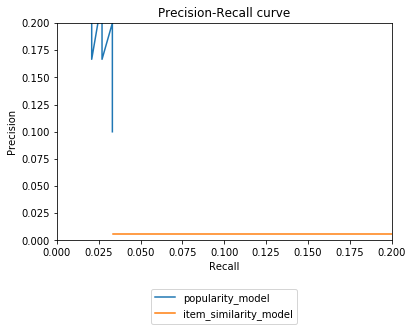

In [41]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [48]:
print("Two precision-recall curves represent the performance levels of popularity and collaborative model. popularity mpdel clearly outperforms collaborative model.")

Two precision-recall curves represent the performance levels of popularity and collaborative model. popularity mpdel clearly outperforms collaborative model.


In [42]:
#Pros and Cons for Collaborative filtering are 
#Pros: Easy to implement.Context independent. Compared to other techniques, such as content-based, it is more accurate.
#Cons: Sparsity:: The percentage of people who rate items is really low.
#Scalability: The more K neighbors we consider (under a certain threshold), the better my classification should be. Nevertheless, the more users there are in the system, the greater the cost of finding the nearest K neighbors will be.
#Cold-start: New users will have no to little information about them to be compared with other users.
#New item: Just like the last point, new items will lack of ratings to create a solid ranking (More of this on ‘How to sort and rank items’).

In [43]:
#We saw User-Based and Item-Based Collaborative Filtering. The first has a focus on filling an user-item matrix and recommending based on the users more similar to the active user. On the other hand, IB-CF fills a Item-Item matrix, and recommends based on similar items.

In [44]:
#In applications where user-base is large, user-based approaches face scalability issues, as their complexity grows linearly with number of users. Item-based approaches address these scalability concerns to recommend items based on item similarities.

In [45]:
#we studied what a recommender system is and how we can create it in Python using only the Pandas library. It is important to mention that the recommender system we created is very simple. Real-life recommender systems use very complex algorithms and will be discussed in a later article.